# Project 1. Sentiment Analysis

## Task 1. Exploratory Data Analysis

In [60]:
# import packages
import pandas as pd
import numpy as np
import pprint as pp
import preprocessor as p
import re
from nltk.util import ngrams
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from collections import Counter
import matplotlib.pyplot as plt
from nltk.stem.porter import *
import emoji
import enchant
import warnings

warnings.filterwarnings('ignore')

In [4]:
# Function: Load Data
def load_data(data):
    # Read in the txt file and turn into a pandas df 
    ids = []
    labels = []
    texts = []
    with open(data, 'r') as f:
        for line in f:
            if line.strip():
                fields = line.lower().strip().split("\t")
                ids.append(fields[0])
                labels.append(fields[1])
                texts.append(fields[2])
        df = pd.DataFrame(
    {'id': ids,
     'label': labels,
     'text': texts
    })
    return df

In [5]:
# Function: Clean Tweet
def clean_tweet(text):
    # Write a function to clean emojis, smileys, mentions, punctuations & urls
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.EMOJI,p.OPT.SMILEY,p.OPT.HASHTAG)
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', ' ', p.clean(text))
    return clean_text

In [6]:
# Function: Get Tokens
def get_tokens(data):
    all_token_list = []
    tt = TweetTokenizer()
    for t in data['text']:
        token = tt.tokenize(t)
        all_token_list.append(token)
    all_token = [item for sublist in all_token_list for item in sublist]
    return all_token

In [8]:
# Function: Get Vocabs
def get_vocab(data):
    # All punctuations, hashtag, urls and emojis are cleaned
    all_vocab_list = []
    for t in data['text']:
        vocab = clean_tweet(t).split()
        all_vocab_list.append(vocab)
    all_vocab = [item for sublist in all_vocab_list for item in sublist]
    return all_vocab

In [9]:
# Function: Get N-Gram
def get_ngrams_word(data):
    ngram2s = []
    ngram3s = []
    ngram4s = []
    ngram5s = []
    for t in data['text']:
        # clean emojis, smileys, mentions, punctuations & urls
        clean_t = clean_tweet(t)
        tokens = [token for token in clean_t.split(" ") if token != ""]
        ngram2s.append(list(ngrams(tokens, 2)))
        ngram3s.append(list(ngrams(tokens, 3)))
        ngram4s.append(list(ngrams(tokens, 4)))
        ngram5s.append(list(ngrams(tokens, 5)))
    return [ngram2s, ngram3s, ngram4s, ngram5s]

In [11]:
# Function: Get ngram char
def get_ngrams_char(data):
    ngram2s = []
    ngram3s = []
    ngram4s = []
    ngram5s = []
    ngram6s = []
    ngram7s = []
    results = [ngram2s, ngram3s, ngram4s, ngram5s, ngram6s, ngram7s]
    for t in data['text']:
        # Clean emojis, smileys, mentions, punctuations & urls
        clean_t = clean_tweet(t)
        # Only consider if the ngram belongs to a word 
        for i in [2,3,4,5,6,7]:
            n=i
            result = results[i-2]
            for token in clean_t.split(" "):
                if token != "":
                    ngram_c = [token[i:i+n] for i in range(len(token)-n+1) if i !=""]
                    if ngram_c != []:
                        result.append(ngram_c)
    return results

### Explore Input Data

In [16]:
# Load Input Data
INPUT = load_data('P1_Data/Dev/INPUT.txt')

In [17]:
# 1. Total Number of Tweets
len(INPUT)

12284

In [19]:
# 2. Total Number of Characters:
sum(INPUT['text'].apply(lambda x:len(x)))

1344051

In [20]:
# 3. Total Number of Distinct Words (Vocalbulary)
# All punctuations, hashtag, urls and emojis are cleaned
all_vocab_list = []
for t in INPUT['text']:
    vocab = clean_tweet(t).split()
    all_vocab_list.append(vocab)
all_vocab = [item for sublist in all_vocab_list for item in sublist]
all_type = pd.unique(all_vocab)
len(all_type)

17540

In [21]:
# 4.1. The Average Number of Characters in Each Tweet
round((INPUT['text'].apply(lambda x:len(x))).mean(),2)

109.41

In [23]:
# 4.2. The Average Number of Words in Each Tweet (Tweets Cleaned)
round(INPUT['text'].apply(lambda x:len(clean_tweet(x).split())).mean(),2)

13.66

In [24]:
# 5.1. The Average Number of Characters per Token
all_token = get_tokens(INPUT)
round(np.mean(list(map(lambda x:len(x), all_token))),2)

5.31

In [25]:
# 5.2. The Standard Deviation of Characters per Token
round(np.std(list(map(lambda x:len(x), all_token))),2)

4.69

In [26]:
# 6. Number of Token for Each of Top 10 Most Frequent Words (Types)
Counter(all_vocab).most_common(10)

[('the', 5747),
 ('to', 3803),
 ('a', 2964),
 ('of', 2599),
 ('and', 2468),
 ('in', 2285),
 ('is', 2249),
 ('s', 2218),
 ('i', 2205),
 ('for', 1950)]

In [27]:
# 7. Token / Type Ratio
round(len(all_token) / len(all_type),2)

12.52

In [33]:
# 8. Number of N-grams (of words) for n = 2,3,4,5 
num_unique_ngram = []
for ngram_list in get_ngrams_word(INPUT):
    flatlist = [item for sublist in ngram_list for item in sublist]
    unique_ngram_list = np.unique (flatlist,axis=0)
    num_unique_ngram.append(len(unique_ngram_list))
# 8.1. Num of Distinct ngram word (n=2)
num_unique_ngram[0]

94628

In [34]:
# 8.2. Num of Distinct ngram word (n=3)
num_unique_ngram[1]

128791

In [35]:
# 8.3. Num of Distinct ngram word (n=4)
num_unique_ngram[2]

127755

In [36]:
# 8.4. Num of Distinct ngram word (n=5)
num_unique_ngram[3]

118291

In [38]:
# 9. Number of Distinct N-grams (of char) for n = 2,3,4,5,6,7
num_unique_ngram_c = []
for ngram_list in get_ngrams_char(INPUT):
    flatlist = [item for sublist in ngram_list for item in sublist]
    unique_ngram_list = np.unique (flatlist,axis=0)
    num_unique_ngram_c.append(len(unique_ngram_list))
# 9.1. Num of Distinct ngram char (n=2)
num_unique_ngram_c[0]

952

In [39]:
# 9.2. Num of Distinct ngram char (n=3)
num_unique_ngram_c[1]

6417

In [40]:
# 9.3. Num of Distinct ngram char (n=4)
num_unique_ngram_c[2]

18219

In [41]:
# 9.4. Num of Distinct ngram char (n=5)
num_unique_ngram_c[3]

25248

In [42]:
# 9.5. Num of Distinct ngram char (n=6)
num_unique_ngram_c[4]

23953

In [43]:
# 9.6. Num of Distinct ngram char (n=7)
num_unique_ngram_c[5]

19056

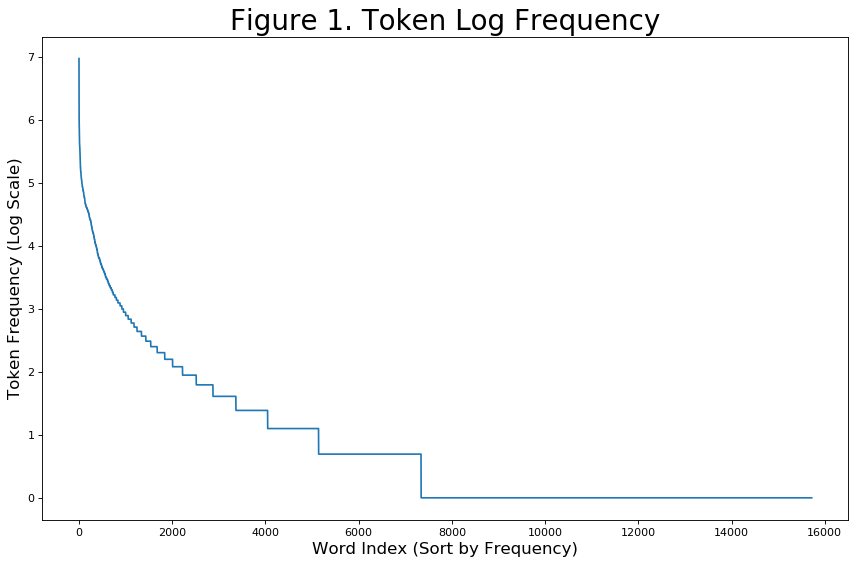

In [50]:
# 10. Plot a token log frequency. 
# Describe what this plot means and how to interpret it. 
# Describe out it might help you understand coverage when training a model?
stop_words = set(stopwords.words('english'))
non_stop = []
for v in all_vocab:
    if v not in stop_words:
        non_stop.append(v)
lemmatizer = WordNetLemmatizer()
all_lemma = []
for v in non_stop:
    lemma = lemmatizer.lemmatize(v)
    all_lemma.append(lemma)
all_lemma_cnt = dict(Counter(all_lemma))
sort_lemma_cnt = sorted(all_lemma_cnt.items(), key = lambda x : x[1], reverse=True)
sort_lemma_df = pd.DataFrame.from_dict(sort_lemma_cnt)
sort_lemma_df.columns = ["Word", "Count"]

fig = plt.figure(figsize=(13,8),dpi = 80)
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.log(sort_lemma_df["Count"]))
ax.set_xlabel('Word Index (Sort by Frequency)', fontsize = 15)
ax.set_ylabel('Token Frequency (Log Scale)', fontsize = 15)
ax.set_title("Figure 1. Token Log Frequency", fontsize = 25)
# Figure 1: We removed stop words and lemmatized all the words. 
# The plot shows that the majority of words only occur once or twice. 
# Therefore we might remove these words when we train the model.
plt.savefig("token log frequency.png")

### Explore Gold Data

In [47]:
# Load Data Dev, Dev_Train, Dev_Test, test, input
dev = load_data('P1_Data/Gold/dev.txt')
dev_train = load_data('P1_Data/Gold/train.txt')
dev_test = load_data('P1_Data/Gold/test.txt')
devtest = load_data('P1_Data/Gold/devtest.txt')

In [48]:
# 11. The number of types in the dev data but not in the training data (OOV).
# Types in dev data
all_type_dev = pd.unique(get_vocab(dev))
# Types in train data
all_type_train = pd.unique(get_vocab(dev_train))
# Different types
oov_list = list(set(all_type_dev).difference(set(all_type_train)))
len(oov_list)

2251

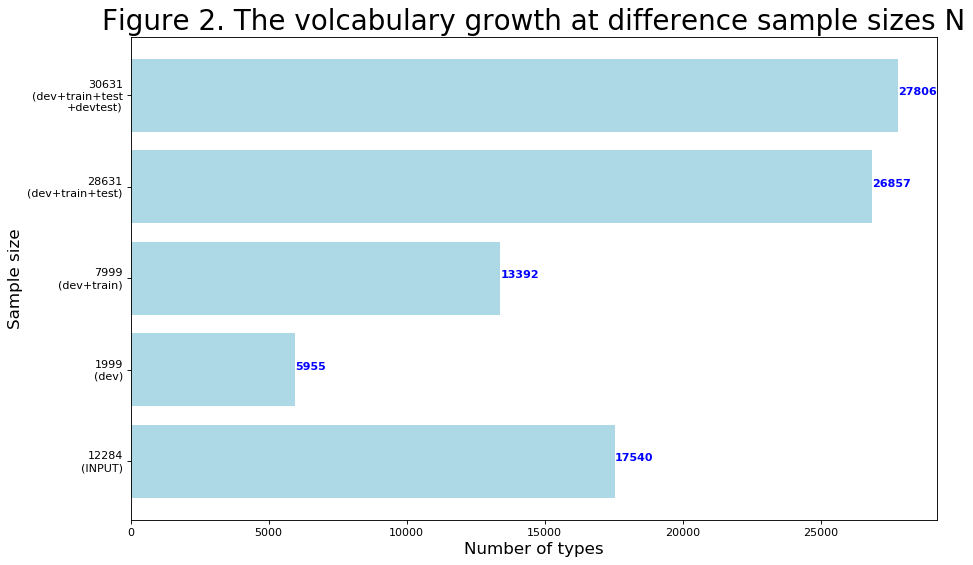

In [49]:
# 12. The vocabulary growth (types) Combinng four gold data sets against input data. 
# Types in INPUT data
all_type_input = pd.unique(get_vocab(INPUT))
# Types in test data
all_type_test = pd.unique(get_vocab(dev_test))
# Types in devtest data
all_type_devtest = pd.unique(get_vocab(devtest))
# The volcabulary growth at difference sample sizes N
input_type_count = len(all_type_input)
# Number of types in dev data
gold_one_type_count = len(all_type_dev)
# Number of types in dev+train data
all_type_two = pd.unique(list(set(all_type_dev).union(set(all_type_train))))
gold_two_type_count = len(all_type_two)
# Number of types in dev+train+test data    
all_type_three = pd.unique(list(set(all_type_dev).union(set(all_type_train)).union(set(all_type_test))))
gold_three_type_count = len(all_type_three)
# Number of types in dev+train+test+devtest data    
all_type_four = pd.unique(list(set(all_type_dev).union(set(all_type_train)).union(set(all_type_test)).union(set(all_type_devtest))))
gold_four_type_count = len(all_type_four)

# Plot vocabulary growth at difference sample sizes N.
len_INPUT = len(INPUT)
len_dev = len(dev)
len_dev_train = len(dev_train)
len_dev_test = len(dev_test)
len_devtest = len(devtest)
type_count = [input_type_count, gold_one_type_count, gold_two_type_count,gold_three_type_count, gold_four_type_count]
sample_size_label = [str(len_INPUT)+"\n"+"(INPUT)",str(len_dev)+"\n"+"(dev)",
                         str(len_dev+len_dev_train)+"\n"+"(dev+train)",
                         str(len_dev+len_dev_train+len_dev_test)
                         +"\n"+"(dev+train+test)",
                         str(len_dev+len_dev_train+len_dev_test+len_devtest)
                         +"\n"+"(dev+train+test"+"\n"+"+devtest)"]
fig = plt.figure(figsize=(13,8),dpi = 80)
ax = fig.add_subplot(1,1,1)
ax.barh(range(len(type_count)),type_count,color='lightblue',tick_label=sample_size_label)
#pl.xticks(rotation=90)
for i ,v in enumerate(type_count):
    ax.text(v, i, str(int(type_count[i])), color='blue', fontweight='bold')
ax.set_title('Figure 2. The volcabulary growth at difference sample sizes N',fontsize=25)
ax.set_ylabel('Sample size', fontsize = 15)
ax.set_xlabel('Number of types', fontsize = 15)
# Figure 2
plt.savefig('volcabulary growth.png')


In [51]:
# 13. The class distribution of the training data set
count_train_positive = dev_train['label'][dev_train['label']=='positive'].count()
count_train_negative = dev_train['label'][dev_train['label']=='negative'].count()
count_train_neutral = dev_train['label'][dev_train['label']=='neutral'].count()
# 13.1 Num of positive tweets in the training set
count_train_positive

3094

In [52]:
# 13.2 Num of negative tweets in the training set
count_train_negative

863

In [53]:
# 13.3 Num of neutral tweets in the training set
count_train_neutral

2043

In [54]:
# 14. The difference between the top word types across these three classes.
all_vocab_train = {}
for i in ['positive', 'negative', 'neutral']:
    all_vocab_list = []
    for t in dev_train['text'][dev_train['label']==i]:
        vocab = clean_tweet(t).split()
        all_vocab_list.append(vocab)
    all_vocab = [item for sublist in all_vocab_list for item in sublist]
    all_vocab_train[i]=all_vocab
train_positive_types = Counter(all_vocab_train['positive']).most_common(100)
train_negative_types = Counter(all_vocab_train['negative']).most_common(100)
train_neutral_types = Counter(all_vocab_train['neutral']).most_common(100)

#### 14.1 Positive top word types
Positive top word types such as 'good', 'best', 'great' ,'love', 'happy' directly point to the positive side; 'friday', 'saturday' and 'sunday' represent the happy weekend time; 
'game', 'birthday', 'church' represent some scenes with joy and relax. 

#### 14.2 Negative top word types
Negative top word types such as 'don', 'no' directly point to the negative side; 'trump', 'donald', 'bush', 'hillary' point to some politicians. 

#### 14.3 Neutral top word types
Neutral top word types are kind of at the 'middle' of positive and negative word types.

In [57]:
# 15. What words are particularly characteristic of your training set and dev set? 
# Are they the same?
train_types = Counter(get_vocab(dev_train)).most_common(150)
dev_types = Counter(get_vocab(dev)).most_common(150)

#### 15.1 Training set characteristic words:
'amazon', 'apple', 'google', 'game', 'sun', 'best', 'good', 'trump', 'galaxy', 'biden', 'lexus', 'arsenal'

#### 15.2 Dev set characteristic words:
'serena', 'minecraft', 'nike', 'oracle', 'snoop', 'pride', 'parade', 'netflix', 'monsanto', 'nintendo'

#### 15.3 Differences
It seems that training set contains more politician related words while dev set contains more game and entertainment related words.

## TASK 2:  Message Polarity Classification

In [ ]:
### Data Preprocessing
